## Example notebook how to use the neural network

We will demonstrate the use of the neural network on the MNIST dataset. 
We will use fetch_openml to download the MNIST dataset.
This example uses other libraries than numpy but these are just for support, they do not contribute to the neural network

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

It is nice, the dataset is already preprocessed for us:

In [3]:
X = np.array(mnist.data.astype('float32'))
y = mnist.target.astype('int64')
X.shape

(70000, 784)

Visualization of a handwritten digit using matplotlib:

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

1


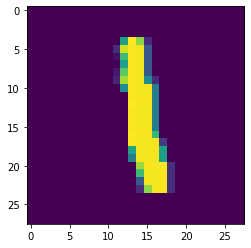

In [5]:
imgplot = plt.imshow(X[6].reshape(28,28))
print(y[6])

Splitting the data to train, validation and test sets. We have to use one-hot encoding for the labels:

In [6]:
from utils import categorical_to_onehot

In [7]:
train_x = np.array(X[:50000])/255.
train_y = categorical_to_onehot(np.array(y[:50000]))

validation_x = np.array(X[:10000])/255.
validation_y = categorical_to_onehot(np.array(y[:10000]))

test_x = np.array(X[:10000])/255.
test_y = categorical_to_onehot(np.array(y[:10000]))

In [10]:
from layers import InputLayer, DenseLayer, ActivationLayer
from activations import softmax
from optimizers import GradientDescentOptmizer
from costs import BinaryCrossEntropyCost
from metrics import CategoricalAccuracyMetric
from utils import format_data

We initialize the network:

In [11]:
from neural import Neural

In [12]:
network = Neural(
  optimizer=GradientDescentOptmizer(learning_rate=0.001),
  cost=BinaryCrossEntropyCost(),
  metric=CategoricalAccuracyMetric()
)

We define the network by adding layers together. 
The first layer has to be a InputLayer. Without this, the network will fail to compile. 
Currently, the network only can have fully connected dense layers. We can combine multiple layers together. 

In [13]:
network.add_layer(InputLayer(shape=(784)))
network.add_layer(DenseLayer(units=64))
network.add_layer(DenseLayer(units=10))
network.add_layer(ActivationLayer(function=softmax))

We compile the network. After compilation, the network must be built again from the beginning if we want to modify the layers. 

In [14]:
network.compile()

We call the neural.train function to train the network,

In [15]:
network.train(train_data=(train_x, train_y),
            epochs=3,
            batch_size=32,
            validation_data=(validation_x, validation_y),
            test_data=(test_x, test_y))

Training

Epoch: 1/3	2022-01-07 23:25:44.762720
Train:	Accu: 0.875	Loss: 0.748
Valid:	Accu: 0.907	Loss: 0.549
Time: 0:00:02.967752

Epoch: 2/3	2022-01-07 23:25:47.730502
Train:	Accu: 1.000	Loss: 0.156
Valid:	Accu: 0.919	Loss: 0.492
Time: 0:00:02.244662

Epoch: 3/3	2022-01-07 23:25:49.975197
Train:	Accu: 0.875	Loss: 0.928
Valid:	Accu: 0.922	Loss: 0.471
Time: 0:00:02.544770

Test:	Accu: 0.922	Loss: 0.471

Done



After a few epochs, we reach around 0.92 accuracy, which is okay for a small network like this (but really bad in general on the MNIST). 

To see the predictions, we can use similar visualization with matplotlib. We can see, that the model corretly predicts the digits most of the time. 

[[8.77810825e-05 6.48975076e-09 9.87477302e-10 5.44502311e-05
  1.10849722e-03 1.98878719e-04 6.38949911e-09 9.86050003e-01
  1.13938723e-04 1.23864372e-02]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


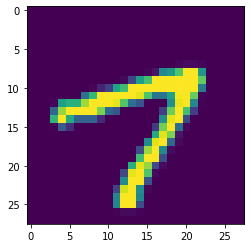

In [16]:
test_number = 101
print(network.predict([test_x[test_number]]))
imgplot = plt.imshow(test_x[test_number].reshape(28,28))
print(test_y[test_number])